In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

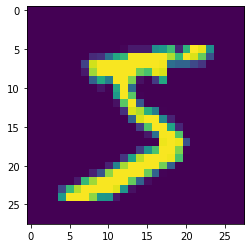

In [0]:
np.set_printoptions(threshold=np.inf, linewidth=280)
print(x_train[0])
plt.imshow(x_train[0])

In [0]:
print(x_train.shape)

x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test=x_test/255.0

print(x_train.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x_train,y_train,epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 20s 338us/sample - loss: 0.1810 - acc: 0.9468


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               216448    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 217,838
Trainable params: 217,838
Non-trainable params: 0
_________________________________________________________________


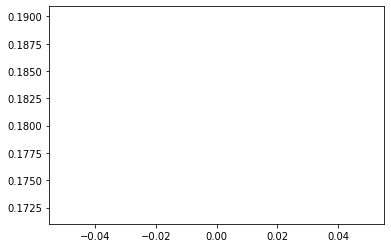

In [0]:
plt.plot(history.history['loss'])
model.summary()

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 158us/sample - loss: 0.0618 - acc: 0.9805


[0.061848457231745126, 0.9805]